In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import math
import importlib
import mcmc_functions
import re
importlib.reload(mcmc_functions)

from mcmc_functions import *
import importlib

seasons_missing_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/premier-league-matches.csv')
tables_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/pl-tables-1993-2024.csv')
recent_df = pd.read_csv('matches.csv')
recent_df = recent_df[recent_df['Venue'] == 'Home']

In [2]:
converted_recent_df = convert_match_data(recent_df)
converted_recent_df = converted_recent_df.sort_values(by='Wk').reset_index(drop=True)

# Apply to the 'Home' column
converted_recent_df['Home'] = converted_recent_df['Home'].apply(insert_space)
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Brightonand Hove Albion', 'Brighton')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Manchester United', 'Manchester Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Newcastle United', 'Newcastle Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Nottingham Forest', "Nott'ham Forest")
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Sheffield United', 'Sheffield Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Tottenham Hotspur', 'Tottenham')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('West Ham United', 'West Ham')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Wolverhampton Wanderers', 'Wolves')

seasons_df = pd.concat([seasons_missing_df, converted_recent_df], ignore_index=True)

In [3]:
full_strength_dict, full_parameters, full_acceptance_counters, full_tracked_parameters, full_strength_dict_original, full_parameters_original = (
mcmc(seasons_df, 2013, 2024, burn_in = 30000, iterations = 50000, k = True))

KeyboardInterrupt: 

In [5]:
full_acceptance_counters


{'Strength': {'accepted': 43005, 'total': 67802},
 'Home Advantage': {'accepted': 37,
  'total': 3434,
  'percentage': 1.0774606872451953},
 'Away Advantage': {'accepted': 42,
  'total': 3403,
  'percentage': 1.2342051131354688},
 'Mu_P': {'accepted': 35, 'total': 3395, 'percentage': 1.0309278350515463},
 'Sigma_P': {'accepted': 35, 'total': 3395, 'percentage': 1.0309278350515463},
 'Eta': {'accepted': 32, 'total': 3485, 'percentage': 0.9182209469153515},
 'Sigma_S': {'accepted': 32, 'total': 3485, 'percentage': 0.9182209469153515},
 'k': {'accepted': 8, 'total': 3481, 'percentage': 0.2298190175237001}}

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


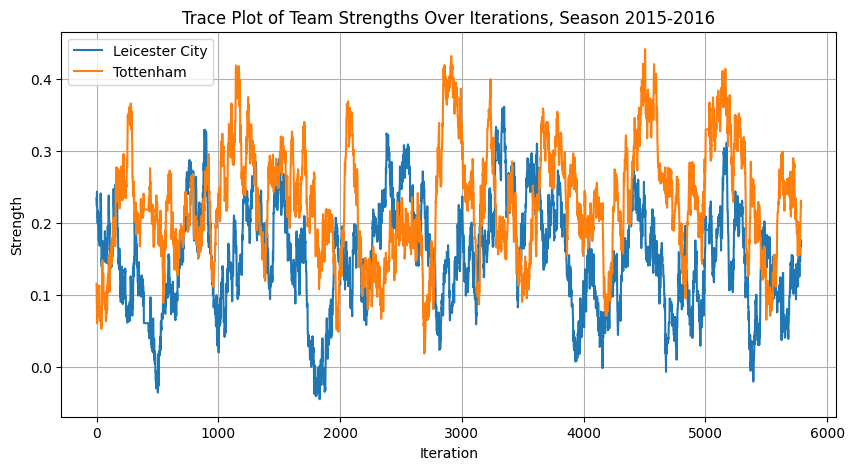

In [17]:
trace_plot_strength(full_strength_dict, ['Leicester City', 'Tottenham'], 2016)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


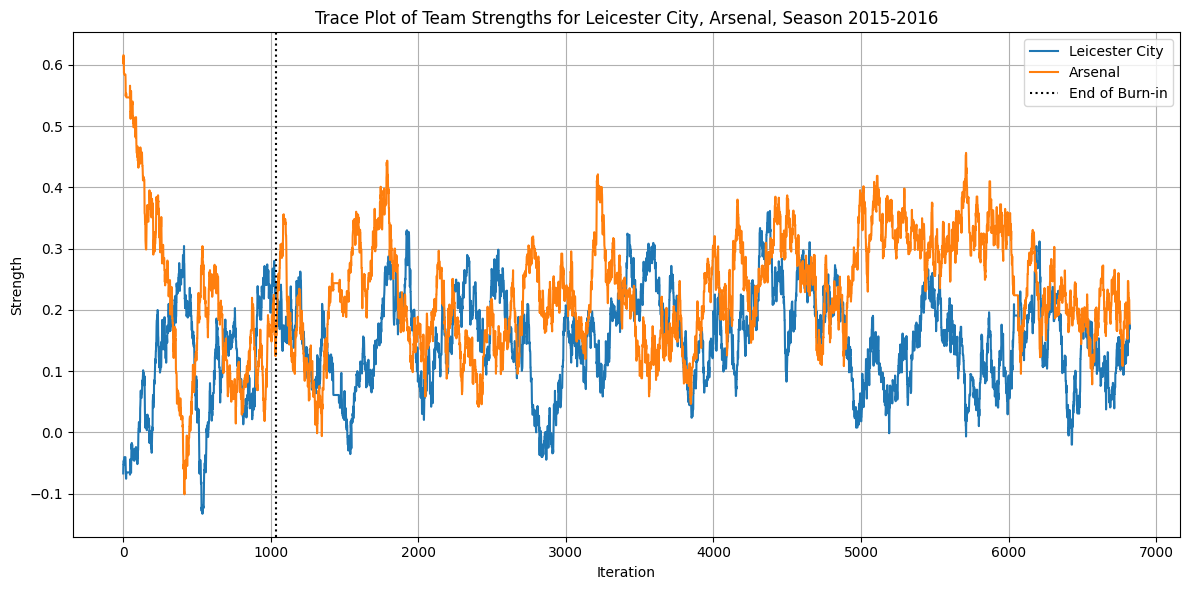

In [18]:
trace_plot_strength_with_burnin(full_strength_dict, full_strength_dict_original, ['Leicester City', 'Arsenal'], 2016)

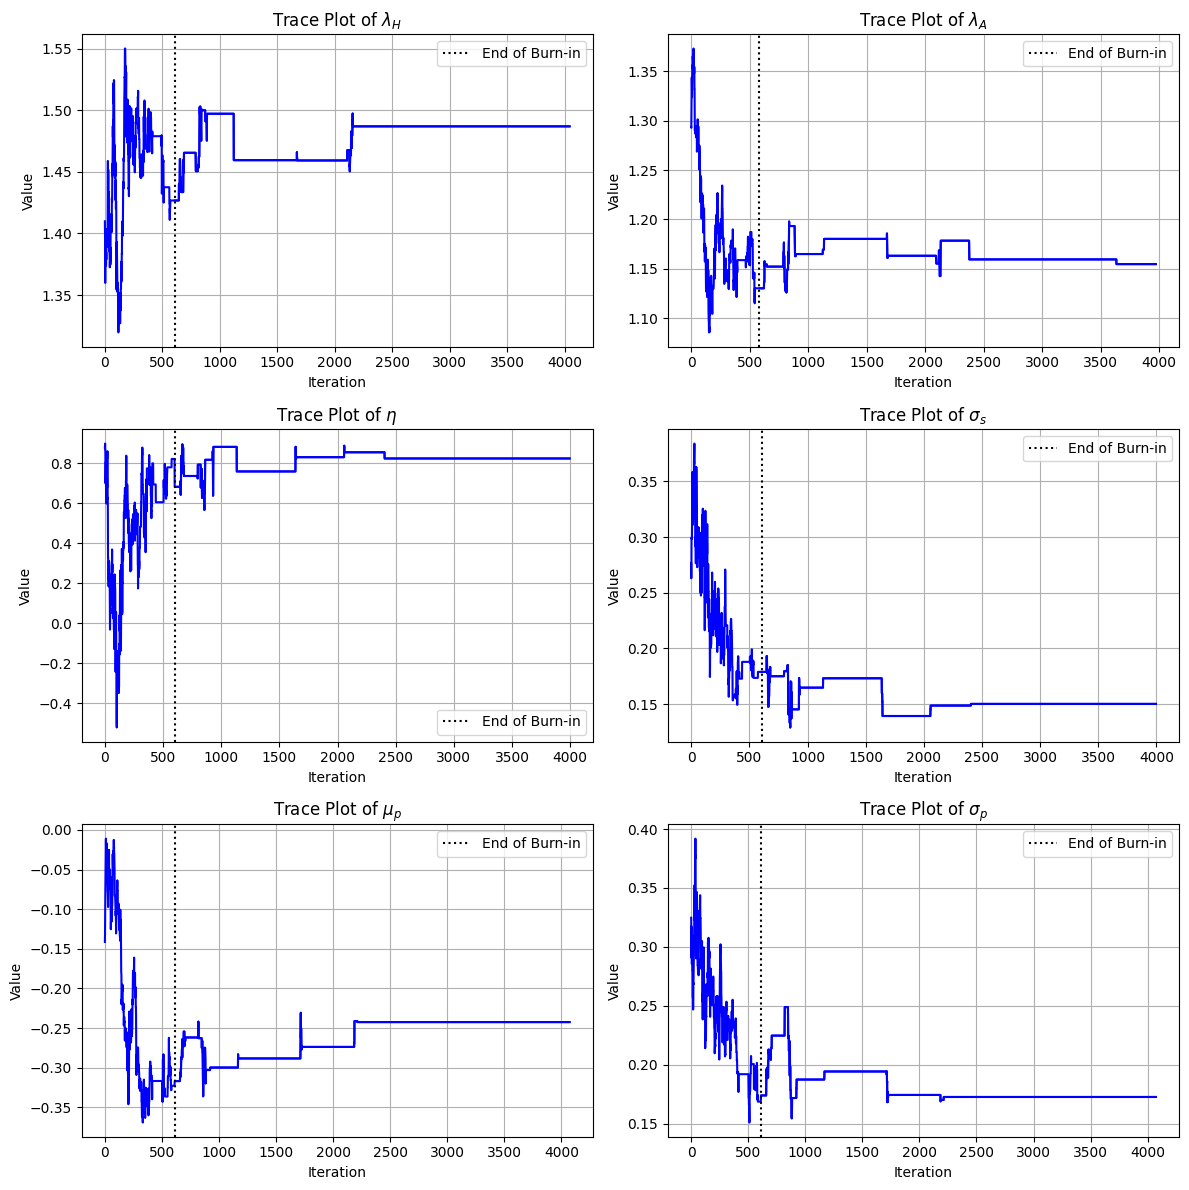

In [19]:
trace_plot_parameter_with_burnin(full_parameters, full_parameters_original)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


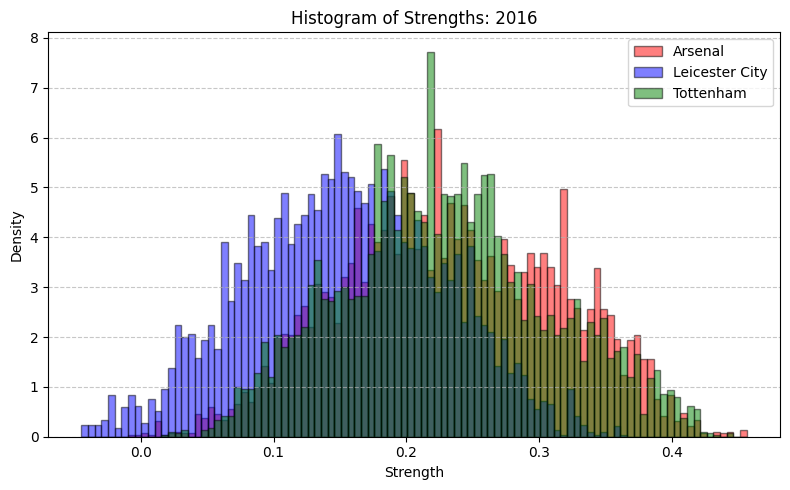

In [21]:
strength_histogram(full_strength_dict, ['Arsenal', 'Leicester City', 'Tottenham'], 2016, colours = ['Red', 'Blue', 'Green'], bins = 100)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


Arsenal's strength was greater than Leicester City's strength in 90.01760563380282% of the iterations


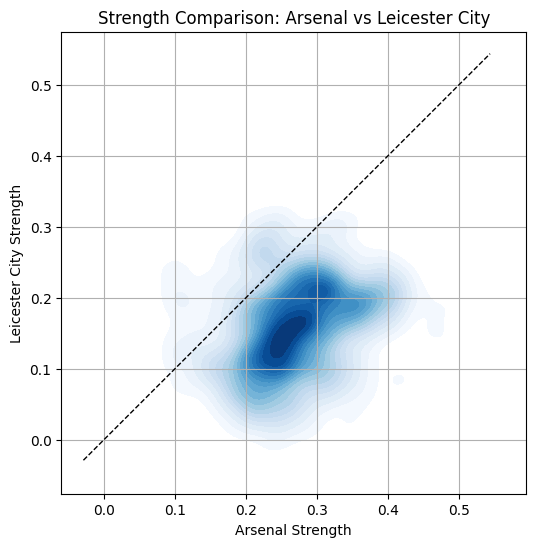

In [12]:
comparison_plot(full_strength_dict, 'Arsenal', 'Leicester City', 2016)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


Effective Sample Size for Leicester City: 51.86 out of 5680


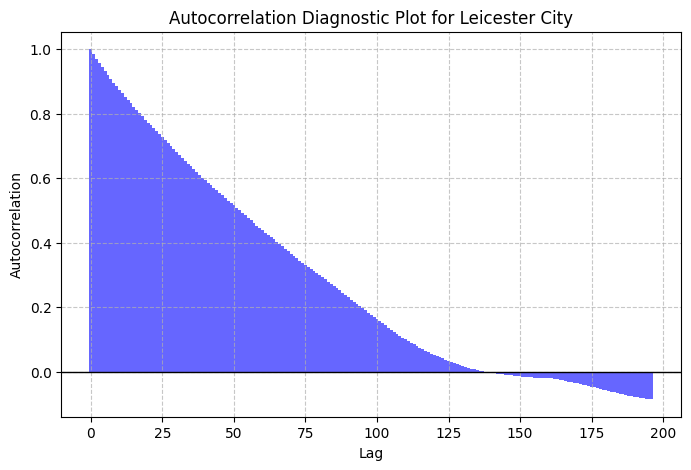

[np.float64(1.0),
 np.float64(0.9853407362587413),
 np.float64(0.9711809529722736),
 np.float64(0.9572628532295373),
 np.float64(0.9443352008815376),
 np.float64(0.9320518053662742),
 np.float64(0.9197276517255362),
 np.float64(0.9078730800418459),
 np.float64(0.8964865843011833),
 np.float64(0.8853327014216769),
 np.float64(0.8743199124455082),
 np.float64(0.8636110058220344),
 np.float64(0.853000003880505),
 np.float64(0.8422665789572577),
 np.float64(0.8318868765430253),
 np.float64(0.8212717749320744),
 np.float64(0.8111572848510624),
 np.float64(0.8014282604855826),
 np.float64(0.7916251981499787),
 np.float64(0.7820694017819926),
 np.float64(0.7728472779628197),
 np.float64(0.7638331376137467),
 np.float64(0.7545496705291526),
 np.float64(0.7451542965956335),
 np.float64(0.736152484536087),
 np.float64(0.7269430271298368),
 np.float64(0.7175458359959379),
 np.float64(0.7082201896121239),
 np.float64(0.6995295703165616),
 np.float64(0.690284214655087),
 np.float64(0.68076739339769

In [11]:
autocorrelation_plot(full_strength_dict, 'Leicester City', 2016)